### Name: Joshua Andres Grajales

#### Wesleyan University ASTR 221

## Problem Set 3.2: Integrating star formation histories and the IMF

In this problem set, we will be examining the distribution of stellar masses and luminosities in a galaxy with a complex star formation history (SFH) whose value is known only at discrete points in time.  This will involve *integrating* the SFH and the IMF numerically.  We will:

1) Construct a cumulative star formation history to identify the 50\% and 90\% formation times,

2) Write a function to construct the Chabrier IMF as a function of stellar population age,

3) Construct the composite mass function of stars within the galaxy from its star formation history,

4) See how that mass function changed with time, and

5) Integrate the mass function to estimate the galaxy's color as a function of time.

Let's get started!

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.dpi'] = 120
from math import pi
from scipy.interpolate import interp1d

The block below defines the star formation history (SFH) of the galaxy.  After running it, you will have two arrays in memory:
- ```t_sfh```: The times at which the star formation rate is known, in Gyr.
- ```sfh```: Star formation rate at each time in ```t_sfh```, in $M_\odot$/Gyr.

Text(0, 0.5, 'SFR (M$_\\odot$/Gyr)')

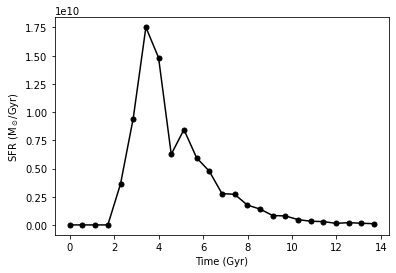

In [3]:
# Just execute this block, no coding necessary

t_sfh = np.linspace(0, 13.7, 25)
sfh = np.array([0.        , 0.        , 0.        , 0.        , 0.03630319,
                0.094309  , 0.17522691, 0.14821342, 0.06261158, 0.08447459,
                0.05950917, 0.04760306, 0.02776247, 0.02714074, 0.01759274,
                0.01404661, 0.00833308, 0.00795695, 0.00470496, 0.00326314,
                0.00294009, 0.00137289, 0.0020292 , 0.00145803, 0.00106786])*1.e11

fig, ax = plt.subplots()
plt.plot(t_sfh, sfh, 'o-', ms=5, color='black')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel(r'SFR (M$_\odot$/Gyr)')

## Calculate the cumulative star formation history (8 points)

The total mass of stars that have been formed in the galaxy by time $t$ (the *cumulative* star formation history) is given by
$$ M_{\rm formed}(t) = \int_0^t {\rm SFR}(t)~dt. $$
Use the trapezoid rule to calculate $M_{\rm formed}(t)$ at each of the times in ```t_sfh```, and plot it.  You may use a modified version of the code from Tutorial 6.

(Note: $M_{\rm formed}(t)$ is similar, but not identical, to the total stellar mass of the galaxy as a function of time $M_*(t)$.  Remember that massive stars evolve and die!  So $M_{\rm formed}(t)$ will always be a little higher than the actual $M_*(t)$ at a given time.)

In [4]:
# Estimates the definite integral of y over the range given by x
# Assumes that x and y are numpy arrays
# Assumes that the points are evenly spaced

def massFormed(x,y,t):
    '''
    returns the total mass in stars at time t given the discrete SFH
    x: discrete time of SFH [Gyr]
    y: SFR in M_sun / [Gyr]
    '''
    # filter x less than our equal to our specified time t
    boundX = x[x <= t]
    boundY = y[x <= t]
    # catch the edge case where you have less than 2 data points --> cannot define deltax 
    return int_trapezoid(boundX, boundY) if len(boundX) > 1 else 0 

def int_trapezoid(x,y):
    # calc the difference between any two conseuctive data points in our time array
    deltax = x[1] - x[0]
    # return the sum of the 
    return (np.sum(y) - y[0]/2 - y[-1]/2)*deltax

Text(0.5, 1.0, 'Commulative Star Formation History')

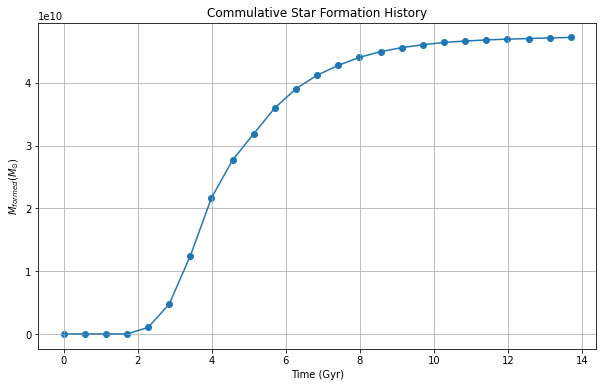

In [5]:
# calc the mass formed for all time data points in t_sfh
plt.figure(figsize=(10,6))
plt.plot(t_sfh,[massFormed(t_sfh, sfh, time) for time in t_sfh])
plt.scatter(t_sfh,[massFormed(t_sfh, sfh, time) for time in t_sfh])
plt.xlabel("Time (Gyr)")
plt.ylabel(r"$M_{formed} (M_{\odot})$")
plt.grid()
plt.title("Commulative Star Formation History")

Dividing $M_{\rm formed}(t)$ by its final value will give you $f_{\rm formed}(t)$, the fraction of all the stars which have formed by time $t$.  Use this to calculate and print the times when 50\% and 90\% of stars have been formed.  (Hint: to get a more exact value for this, you may want to *interpolate* to a higher-resolution time array.)

In [6]:
# construct f_formed(t)
fracMassFormed = [massFormed(t_sfh, sfh, time) for time in t_sfh] / [massFormed(t_sfh, sfh, time) for time in t_sfh][-1]
# note that the indices that "sandwhich" .5 are 7 and 8 so interpolate in between these two 
fracMassFormed

array([0.        , 0.        , 0.        , 0.        , 0.02193849,
       0.10086914, 0.26375321, 0.45921242, 0.58661671, 0.67550281,
       0.76251407, 0.82724339, 0.87278776, 0.90596649, 0.93299951,
       0.95211958, 0.96564392, 0.9754882 , 0.98313996, 0.98795518,
       0.99170388, 0.99431027, 0.99636619, 0.99847357, 1.        ])

In [7]:
# interpolat ein between indices 7 and 8 --> .5 is the 3 index so find the corresponding time in the time array 
np.linspace(fracMassFormed[7:9][0],fracMassFormed[7:9][1],10)

array([0.45921242, 0.47336845, 0.48752448, 0.50168052, 0.51583655,
       0.52999258, 0.54414862, 0.55830465, 0.57246068, 0.58661671])

In [8]:
# interpolate between indices 7 and 8, the 3 index in this array is the time at which 50% of the stars have formed
interp50 = np.linspace(t_sfh[7:9][0],t_sfh[7:9][1],10)
interp50

array([3.99583333, 4.05925926, 4.12268519, 4.18611111, 4.24953704,
       4.31296296, 4.37638889, 4.43981481, 4.50324074, 4.56666667])

In [9]:
# repeat the same process for 90%: between indices 12 and 13
np.linspace(fracMassFormed[12:14][0],fracMassFormed[12:14][1],10)

array([0.87278776, 0.87647428, 0.88016081, 0.88384733, 0.88753386,
       0.89122039, 0.89490691, 0.89859344, 0.90227996, 0.90596649])

In [10]:
interp90 = np.linspace(t_sfh[12:14][0],t_sfh[12:14][1],10)
interp90 

array([6.85      , 6.91342593, 6.97685185, 7.04027778, 7.1037037 ,
       7.16712963, 7.23055556, 7.29398148, 7.35740741, 7.42083333])

In [11]:
# YOUR CODE HERE: Calculate and print 50% and 90% formation times
print("50% of the stars have formed by: "+str(interp50[3].round(2))+" Gyr")
print("90% of the stars have formed by: "+str(interp90[-2].round(2))+" Gyr")

50% of the stars have formed by: 4.19 Gyr
90% of the stars have formed by: 7.36 Gyr


## The Chabrier IMF as a function of time (6 points)

For this problem set, we will assume that the galaxy follows a Chabrier IMF.  The function below constructs a Chabrier IMF at the moment a stellar population is born.  As we have discussed, over time massive stars will evolve off the main sequence, truncating the mass function at the "turn-off mass"
$$ M_{\rm TO} = \left( \frac{t}{10^{10}~{\rm yr}} \right)^{-1/2.5}. $$

Modify the function below to truncate the IMF at the appropriate mass given the population age.  Then, plot the resulting IMF at $t = [0, 0.5, 1, 2, 4]$ Gyr from M = 0.1 to 10 $M_\odot$ using log-log axes.

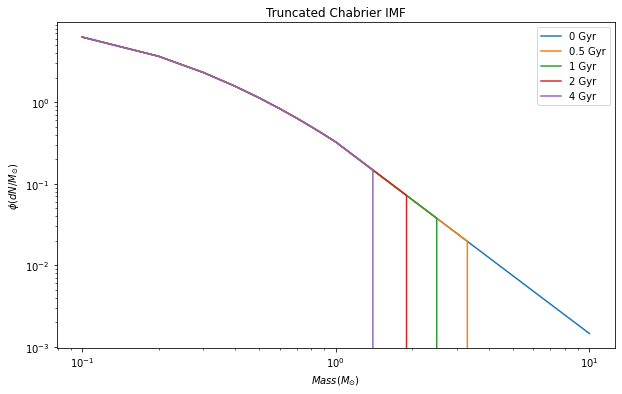

In [19]:
# Gives the value of the Chabrier IMF at masses m, given a population age
# m = numpy array of masses in Msun
# age = population age in Gyr
# Normalized to integrate to 1 Msun (so this is the IMF per solar mass formed)
def imf_chabrier(m, age):
    
    # Salpeter power law at high masses
    phi = m**(-2.35)/3.07
    
    # Log-normal at low masses
    lowm = m < 1
    phi[lowm] = np.exp(-(np.log10(m[lowm]) - np.log10(0.2))**2/0.6)/m[lowm]/np.exp(-np.log10(0.2)**2/0.6)/3.07
    
    # YOUR CODE HERE: Truncate the IMF at M_TO(age)
    if age != 0:
        M_TO = (age*10**9/(10**(10)))**(-1/2.5)
    else: 
        M_TO = 0
    bools = m>=M_TO

    # set everything above the turn off equal to the last mass 
    if False in bools: 
        idx=np.where(bools == False)[0][-1]
        m[bools] = m[idx]

    # signal for turnoff in phi values 
    if age != 0 : phi[bools] = 0
    
    return [m,phi]

# YOUR CODE HERE: Plot the Chabrier IMF at t = 0, 0.5, 1, 2, 4 Gyr from M = 0.1 to 10 Msun using log-log axes
mass = np.linspace(0.1,10,100)
time = [0,0.5,1,2,4]
plt.figure(figsize=(10,6))

for t in time:
    m,phi = imf_chabrier(mass,t)
    plt.plot(m, phi, label = str(t)+" Gyr")
    plt.xlabel(r"$Mass (M_{\odot})$")
    plt.ylabel(r"$\phi (dN/M_{\odot})$")
plt.yscale("log")
plt.xscale("log")
plt.title("Truncated Chabrier IMF")
plt.legend()
    
    

## Final composite mass function (10 points)

The final distribution of stellar masses within the galaxy will be a composite of IMFs at different ages, depending on the star formation history of the galaxy.  More specifically,
$$ \phi_{\rm tot}(m) = \int_0^{t_f} \phi(m,t_f-t)~{\rm SFR}(t)~dt $$
where $t$ is time and $t_f$ is the final time (13.7 Gyr).

Use the trapezoid rule to perform this integral and plot the resulting composite mass function from 0.1 to 10 $M_\odot$.  (We will be neglecting stars above 10 $M_\odot$, because the time resolution of our SFH is not sufficient to capture their formation and evolution.) 

Note: you will not be able to use the int_trapezoid() function here - $\phi$ is a function of $m$ as well as $t$, so you would not be able to pass it in as an argument.  You'll have to write it yourself!

The goal is to get the fraction of stars of a given solar mass realtive to all of the stellar mass
in the universe at time t. As is, SFR gives us the rate at which stars form for a given time t, or in other words the total mass of stars formed per year [$M_{\odot} Gyr^{-1}$]. $\phi$ gives us the distribution of masses as a function of time t. We can then use this to generate the distribution of masses over all t in our t_sfh array: 

$$mass = np.linspace(0.1,10)$$
$$t_f = 13.7$$
$$phiM = [imf\_chabrier(mass, t_f - time) for\space time \space in \space t\_sfh] $$

We can think of this phiT as a matrix where the rows represent different times and the columns represent the distribution of masses. What we want however, is a matrix that is composed of arrays of with mass distributions for a specific mass over time t, [$dist_{M_i,t_i}$, $dist_{M_i,t_i}$...]. To achieve this we take the transpose of phiT: 
$$ phiT = np.transpose(np.array(phiM)) $$
Once we aquire this matirx we can multiply by our normalization constant SFR, noting that each index in the row elements of our matrix correspond to the same time in the SFR array. By doing this we produce a matrix with row elements that represent the integrand of the above function, we are left to perform the trapezoid rule over each rows in the matrix. 


Text(0.5, 1.0, 'Mass Function of Stars at t = 13.7 Gyr')

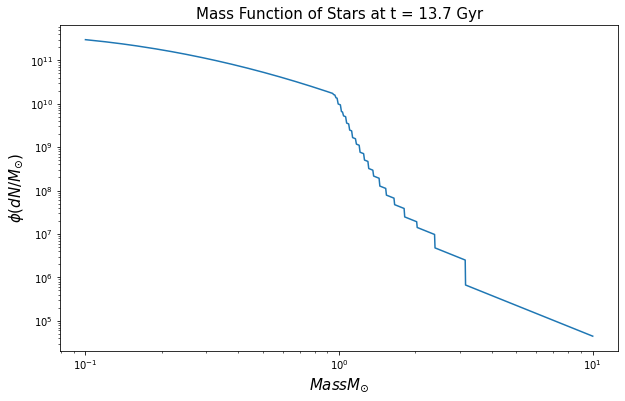

In [20]:
# YOUR CODE HERE - Calculate and plot final composite mass function

t_f = 13.7
# matrix with rows = diff time
phiM = [imf_chabrier(np.linspace(0.1,10,1000),t_f-time)[1] for time in t_sfh]
# matrix with rows = diff mass 
phiT = np.transpose(np.array(phiM))
integrands = phiT*sfh
m = np.linspace(0.1,10,1000)

# all of our cols in phiT are over t, our ind. variable so take the aplpy trapzoid rule to time and phi 
def int_trapezoid(x,y):
    # calc the difference between any two conseuctive data points in our time array
    deltax = x[1] - x[0]
    # return the sum of the 
    return (np.sum(y) - y[0]/2 - y[-1]/2)*deltax

plt.figure(figsize=(10,6))
phiTot = []
for row in integrands:
    phiTot.append(int_trapezoid(t_sfh, row))


plt.plot(m,phiTot)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$Mass M_{\odot}$",fontsize = 15)
plt.ylabel(r"$\phi (dN/M_{\odot}$)",fontsize = 15)
plt.title("Mass Function of Stars at t = 13.7 Gyr", fontsize = 15)

## Composite MF as a function of time (5 points)

In the section above, we calculated the composite mass function at the present day ($t_f$ = 13.7 Gyr), but we can use the same method to calculate it at *any* of our sample points!  Looking at how the composite mass function evolves with time will show us how stars' abundances in the galaxy change as a function of mass.  We expect, for example, that the number of low-mass stars should be continuously increasing as new stellar populations are added to the galaxy.  The number of high-mass stars, on the other hand, should rise and fall as stellar populations are born and massive stars later evolve off the main sequence.

Calculate and plot the composite mass function at five different times $t_f$.

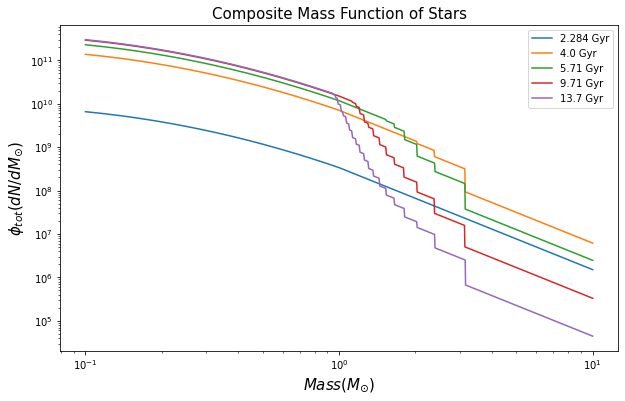

In [47]:
# YOUR CODE HERE
def massFunc(age, time, sfr):

    # first truncate the time and sfr accroding to the age given 
    t_sfh = time[time <= age]
    sfh = sfr[time <= age]

    #do all else as before 

    t_f = age
    # matrix with rows = diff time
    phiM = [imf_chabrier(np.linspace(0.1,10,1000),t_f-t)[1] for t in t_sfh]
    # matrix with rows = diff mass 
    phiT = np.transpose(np.array(phiM))
    integrands = phiT*sfh

    phiTot = []
    for row in integrands:
        phiTot.append(int_trapezoid(t_sfh, row))

    return [np.linspace(0.1,10,1000),phiTot]

ages = [2.284,4.00,5.71,9.71,13.7]
plt.figure(figsize=(10,6))
for age in ages:
    mass,res = massFunc(age,t_sfh,sfh)
    plt.plot(mass,res, label = str(age)+" Gyr")

plt.xscale("log")
plt.yscale('log')
plt.title("Composite Mass Function of Stars", fontsize = 15)
plt.xlabel(r"$Mass (M_{\odot})$", fontsize = 15)
plt.ylabel(r"$\phi_{tot} (dN/dM_{\odot})$", fontsize = 15)
plt.legend()

## Galaxy color as a function of time (10 points)

Among other things, the mass function of the stars in the galaxy tells us something about the galaxy's *color*.  The more high-mass stars, the more blue light; the more low-mass stars, the more red light!  (Although it is not only the low-mass main sequence stars we should be thinking about for red light, as you learned in part 1 of this week's homework - but let's ignore that for now.)

We can get a crude approximation of the color of the galaxy by comparing the total luminosity of high-mass main sequence stars (m > 1) and low-mass main sequence stars (m < 1).  Because the luminosity of a star goes roughly as $m^4$, the luminosity density as a function of mass is
$$\phi_L(m) = m^4~\phi_{\rm tot}(m)$$
where $\phi_{\rm tot}(m)$ is the composite mass function you calculated in the previous section, and the total luminosity emitted by stars with mass $m_1 < m < m_2$ is
$$L(m_1 < m < m_2) = \int_{m_1}^{m_2} m^4 \phi_{\rm tot}(m)~dm.$$

For each of the five times you chose in the previous section, plot $\phi_L(m)$ and calculate and print the fractions of luminosity emitted by high- and low-mass stars, $L(1 < m < 10)/L(0.1<m<10)$ and $L(0.1 < m < 1)/L(0.1<m<10)$.

You should see that the galaxy gets "redder" (i.e., a higher fraction of its light comes from low-mass stars) as the galaxy ages!

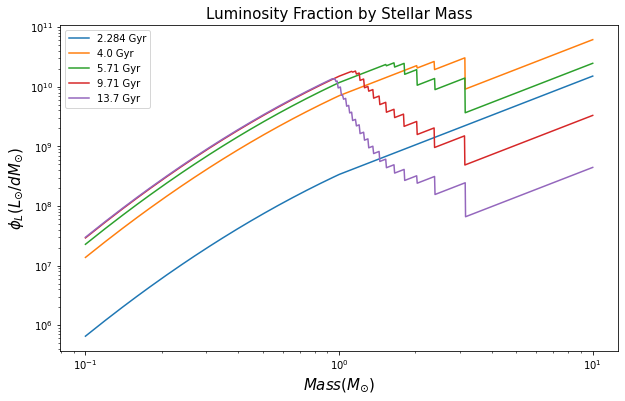

In [61]:
# YOUR CODE HERE
def lumFunc(age, time, sfr):
    
    # first truncate the time and sfr accroding to the age given 
    t_sfh = time[time <= age]
    sfh = sfr[time <= age]

    #do all else as before 

    t_f = age
    # matrix with rows = diff time
    phiM = [imf_chabrier(np.linspace(0.1,10,1000),t_f-t)[1] for t in t_sfh]
    # matrix with rows = diff mass 
    phiT = np.transpose(np.array(phiM))
    integrands = phiT*sfh

    # calc the lum by multiplying my m^4
    i = 0
    lums = [] 
    for mass in np.linspace(0.1,10,1000):
        lums.append((mass**4)*integrands[i])
        i+=1

    lumTot = []
    for row in lums:
        lumTot.append(int_trapezoid(t_sfh, row))

    return [np.linspace(0.1,10,1000),lumTot]

ages = [2.284,4.00,5.71,9.71,13.7]
plt.figure(figsize=(10,6))
for age in ages:
    mass,res = lumFunc(age,t_sfh,sfh)
    plt.plot(mass,res,label = str(age)+" Gyr")

    # # subset the res to do the fraction calcs

    # #fraction 1 calls for 1 < m < 10 & 0.1 < m < 10 
    # f1h = (1 < mass) & (mass < 10)
    # f1l = (0.1 < mass) & (mass < 10)
    # f1 = res[f1h]/res[f1l]
    # print(r"$L(1 < m < 10)/L(0.1<m<10)$ " +str(age)+" Gyr: ")
    # print(f1)

    # print()
    # #fraction 2 calls for 0.1 < m < 1 and 0.1 < m < 10
    # f2h = (0.1 < mass) & (mass < 1)
    # f2l = (0.1 < mass) & (mass < 10)
    # f2 = res[f2h]/res[f2l]
    # print(r"$L(0.1 < m < 1)/L(0.1<m<10)$ "+str(age)+" Gyr: ") 
    # print(f2)

plt.xscale("log")
plt.yscale('log')
plt.title("Luminosity Fraction by Stellar Mass", fontsize = 15)
plt.xlabel(r"$Mass (M_{\odot})$", fontsize = 15)
plt.ylabel(r"$\phi_{L} (L_{\odot}/dM_{\odot})$", fontsize = 15)
plt.legend()


**(1 point)**: How difficult was this assignment?  Did you feel prepared to take it on, or was it totally bewildering?

8/10 It took me alot of time to figure out the 3rd plot but figuring out the 3rd plot made the 4th and 5th easier. Despite the time investment completing the coding portion was rewarding. For future problem sets, I ask that we continue using matrix-based calculations and also review use cases of matrcies in lectures. I want to develop my ability to use matrices to solve computational problems and this was a great opportunity to do so. 

*Your response here*